# Rozwiązania do zadań dla bloku Python Średniozaawansowany

## Wyjątki

#### Przechwyć wynik wyjątku wyrzucanego przez funkcję `raiseErr` i wypisz go z pomocą operacji `print`.

##### Rozwiązanie:

 * wykorzystaj klauzulę `try-except`.

 * przechwyć wyjątek za pomocą `except as`.

In [1]:
def raiseErr():
    raise Exception("Hah! You got me!")

try:
    raiseErr()
except Exception as e:
    print(e)

Hah! You got me!


#### Stwórz funkcję `properDivide`, które przy dzieleniu przez $0$ nie wyrzuci wyjątku a zwróci `inf`. Funkcja wciąż powinna kończyć się poprawnym błędem gdy na przykład dzielimy $\frac{0}{0}$.

##### Rozwiązanie:

 * wykorzystaj klauzulę `try-except`.

 * przechwyć wyjątek `ZeroDivisionError`.

 * zwróć `inf` z biblioteki `math`.

In [2]:
from math import inf

def properDivide(a, b):
    try:
        result = a/b
    except ZeroDivisionError:
        return inf
    return result

properDivide(5, 0)

inf

#### Stwórz plik `dummy.file` i zapisz do niego liczby od $1$ do $10$, każdą w nowej linii. Wykorzystaj do tego manager kontekstu

##### Rozwiązanie:

 * otwórz plik z pomocą `open` z opcją `w`.

 * wykorzystaj funkcję `write` do zapisania liczb.

 * przypisz wynik `open` do zmiennej z pomocą klauzuli `with`.

In [3]:
dummy_file = "dummy.file"

with open(dummy_file, 'w') as f:
    f.writelines([f'{i}\n' for i in range(1, 11)])

#### Korzystając z pliku z poprzedniego zadania, wykorzystując manager kontekstu, dopisz pierwsze $20$ liczb Fibonacciego. Liczby te definiujemy jako

$F_n = F_{n - 1} + F_{n - 2}$

##### Rozwiązanie:

 * otwórz plik z pomocą `open` z opcją `a`.

 * wykorzystaj funkcję `write` do zapisania `fib(i)` w pętli.

 * przypisz wynik `open` do zmiennej z pomocą klauzuli `with`.

In [4]:
def fib(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
    return a

with open(dummy_file, 'a') as f:
    f.writelines([f'{fib(i)}\n' for i in range(20)])

#### Dopisz do pliku z poprzedniego zadania tekst "`Ala ma kota`". Odczytaj z tego pliku $50$ linii i wyświetl każdą jako liczbę zwiększoną o $1$. Wykorzystaj manager kontekstu. Linie, których nie można zinterpretować jako liczb, mają zostać pominięte z pomocą `try-except`.

In [5]:
import os

with open(dummy_file, 'r') as f:
    for i in range(50):
        line = f.readline()
        try:
            print(int(line))
        except:
            pass

if os.path.exists(dummy_file):
    os.remove(dummy_file)

1
2
3
4
5
6
7
8
9
10
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


#### Stwórz klasę wyjątku `TimedException`, która, wraz z wiadomością, będzie przechowywała dane o czasie wystąpienia błędu. Skorzystaj z modułu [datetime](https://docs.python.org/3/library/datetime.html).

##### Rozwiązanie:

 * stwórz klasę dziedziczącą po `Exception`.

 * w konstruktorze ustaw pole `time` na aktualny czas pobrany z `datetime.datetime.now()`.

 * przechwyć wyjątek i wypisz jego czas i wiadomość.

In [6]:
from datetime import datetime

class TimedException(Exception):
    def __init__(self, *args: object) -> None:
        super().__init__(*args)
        self.time = datetime.now()

try:
    raise TimedException("Hello")
except TimedException as e:
    print(f"{e.time}: {e}")

2022-12-18 16:14:03.588914: Hello


#### Napisz klasę `AutodestructingFile` która stworzy plik o lokalizacji zadanej w konstruktorze i pozwoli na zapisywanie i odczytywanie z owego pliku. Obiekt tej klasy, gdy użyty w ramach klauzuli `with`, ma usunąć automatycznie plik z dysku w momencie zakończenia działania, niezależnie od tego, czy klauzula zakończyła się poprawnie czy błędem. Należy zastąpić wszystkie wystąpienia `pass` odpowiednim kodem.

##### Rozwiązanie

 * zapisz zmienną `address` w konstruktorze jako pole obiektu. Następnie stwórz pola `reader` i `writer` i przypisz do nich odpowiednio `open(address, "w")` i `open(address, "r")`.

 * w operacji `write` zapisz tekst do pliku odwołując się do pola `self.writer`. Analogicznie zczytaj treść pliku z pomocą `self.reader` w operacji `write`.

 * w operacji `__exit__` zamknij `self.writer` i `self.reader` oraz usuń plik z pomocą operacji `os.path.exists` i `os.remove`.

Wywołanie powinno zakończyć się tekstem *"This code should fail here and dummy.file should not exist"*.

In [7]:
import os

class AutodestructingFile:

    def __init__(self, address) -> None:
        self.address = address
        self.writer = open(address, "w")
        self.reader = open(address, "r")

    def write(self, text):
        self.writer.write(text)

    def read(self):
        return self.reader.read()

    def __enter__(self):
        return self

    def __exit__(self, type, value, traceback):
        self.reader.close()
        self.writer.close()
        if os.path.exists(self.address):
            os.remove(self.address)


dummy_file_name = "dummy.file"
some_dummy_message = "somedummymessage"

assert not os.path.exists(dummy_file_name)
exception = Exception(f"This code should fail here and {dummy_file_name} should not exist")

try:
    with AutodestructingFile(dummy_file_name) as file:
        assert os.path.exists(dummy_file_name)
        file.write(some_dummy_message)
        print(file.read())

        raise exception
        print("This message should not be displayed")
except Exception as e:
    assert e == exception
    print(e)
assert not os.path.exists(dummy_file_name)


This code should fail here and dummy.file should not exist


## Programowanie obiektowe

#### Wczytaj plik za pomocą `reader`, przetwórz treść za pomocą `converter` i zapisz do pliku za pomocą `writer`. Stwórz klasę `LUFileConverter`, która będzie konwertowała zadany plik zmieniając małe litery w wielkie i vice versa. Stwórz klasę `DoubleFileConverter`, która wykona operacje `converter` dwukrotnie.

`convertFile` w `FileConverter` ma być metodą abstrakcyjną.
`reader` ma posiadać operację `read()`, która zczyta obiekt typu `str` z pewnego pliku.
`writer` ma posiadać operację `write()`, która zapisze do pewnego pliku zadany obiekt typu `str`.
`converter` ma przyjąć obiekt typu `str` i zwrócić obiekt typu `str`.

Skorzystaj z modułu [abc](https://docs.python.org/3/library/abc.html).

##### Rozwiązanie

 - Stwórz plik (`dummy.txt` lub jakikolwiek inny) z dowolną treścią (`Ala ma kota` lub cokolwiek innego).
 - Wczytaj treść tego pliku za pomocą operacji `open` i `read`.
 - Zapisz treść tego pliku za pomocą `open` i `write` do innego pliku (`temp.file` lub jakikolwiek inny).
 - Stwórz funkcję `toUpper`, która przyjmie obiekt typu `str` i zwróci ów tekst z wszystkimi małymi literami zamienionymi na wielkie.
 - Stwórz obiekt typu `FileConverter` i zapisz jako jego pola `reader`, `writer` oraz `toUpper`.
 - Zmień pole `convertFile` w `FileConverter` na metodę abstrakcyjną.

In [8]:
from abc import ABC, abstractmethod

def swapCase(text: str) -> str:
    return text.swapcase()

class FileConverter(ABC):
    def __init__(self, reader, writer, converter) -> None:
        self.reader = reader
        self.writer = writer
        self.converter = converter

    @abstractmethod
    def convertFile(self):
        pass

class LUFileConverter(FileConverter):
    def __init__(self, reader, writer) -> None:
        super().__init__(reader, writer, swapCase)

    def convertFile(self):
        content = self.reader.read()
        content = self.converter(content)
        self.writer.write(content)

class DoubleFileConverter(FileConverter):
    def convertFile(self):
        content = self.reader.read()
        content = self.converter(content)
        content = self.converter(content)
        self.writer.write(content)

In [9]:
def doubleText(text):
    return text + text

in_file = "dummy.txt"
out_file = "temp.file"

with open(in_file, "w") as writer:
    writer.write("Ala ma kota\nA sierotka ma rysia\n\n")

with open(in_file, "r") as reader:
    with open(out_file, "w") as writer:
        fc = DoubleFileConverter(reader, writer, doubleText)
        fc.convertFile()

if os.path.exists(in_file):
    os.remove(in_file)
if os.path.exists(out_file):
    os.remove(out_file)

In [10]:
def doubleText(text):
    return text + text

in_file = "dummy.txt"
out_file = "temp.file"

with open(in_file, "w") as writer:
    writer.write("Ala ma kota\nA sierotka ma rysia\n\n")

with open(in_file, "r") as reader:
    with open(out_file, "w") as writer:
        fc = LUFileConverter(reader, writer)
        fc.convertFile()

if os.path.exists(in_file):
    os.remove(in_file)
if os.path.exists(out_file):
    os.remove(out_file)

#### Napisz strukturę o trzech niemutowalnych polach, którą można posortować oraz przechowywać jako element zbioru.

In [11]:
from dataclasses import dataclass

@dataclass(frozen=True, order=True)
class Triple:
    a: float
    b: float
    c: float

print(sorted([Triple(1, 2, 3), Triple(2, 1, 19), Triple(1, 2, 1), Triple(1, 3, 2)]))
print({Triple(1, 2, 3), Triple(2, 1, 19), Triple(1, 2, 1), Triple(1, 3, 2)})

[Triple(a=1, b=2, c=1), Triple(a=1, b=2, c=3), Triple(a=1, b=3, c=2), Triple(a=2, b=1, c=19)]
{Triple(a=1, b=2, c=1), Triple(a=1, b=3, c=2), Triple(a=1, b=2, c=3), Triple(a=2, b=1, c=19)}


## Serializacja

## Dekoratory

#### Napisz dekorator `doubleResult`, który sprawi, że funkcja dekorowana zwróci wynik przemnożony przez $2$. Udekoruj nim funkcję `returnNumber`.

Rozwiązanie:
 * dekorator powinien zwracać funkcję, która zastąpi funkcję dekorowaną. Napisz definicję funkcji `wrapper` wewnątrz `doubleResult`.
 * funkcja ta nie powinna przyjmować jakichkolwiek argumentów i powinna zwracać wynik funkcji będącej argumentem dekoratora.
 * wartość zwracaną przez `wrapper` przemnóż przez $2$.
 * dekorator powinien na koniec zwrócić `wrapper`.

In [12]:
from random import random

def doubleResult(func):
    def wrapper():
        return 2 * func()
    return wrapper

number = random()

@doubleResult
def returnNumber():
    return number

assert returnNumber() == number * 2

#### Napisz dekorator `multiplyResultBy` będący modyfikacją dekoratora z zadania powyżej. Niech `multiplyResultBy` przyjmuje jeden argument, którym będzie liczba, przez którą zostanie przemnożony wynik funkcji dekorowanej. Udekoruj nim funkcję `returnNumber`.

Rozwiązanie <font size="1" color="gray">(złożone w opisie, bo sam problem niestety jest złożony)</font>:

 * dekorator wywołamy jako `@multiplyResultBy(n)`, czyli sam `multiplyResultBy(n)` jest funkcją, która zwróci dekorator. Stąd dopiero ta funkcja powinna zwrócić dekorator analogiczny do zadania powyżej.

 * w poprzednim zadaniu `doubleResult` zwracał funkcję zastępującą funkcję dekorowaną. Tym razem musimy na podstawie parametru zwrócić dekorator, który przyjmie funkcję dekorowaną i zwróci jej zastępstwo (uff, złożone, co?).

 * <font size="1" color="red">dla matematycznych formalistów</font> dekorator jest postaci $\R\to(\emptyset\to\R)\to\emptyset\to\R$, to jest, pobiera liczbę, przez którą przemnożymy wynik naszej funkcji ($\R\to$) i zwraca funkcję, która bierze funkcję bezparametrową do udekorowania ($(\emptyset\to\R)\to$), ta funkcja zaś zwraca funkcję o tej samej sygnaturze co funkcja dekorowana ($\emptyset\to\R$).

In [13]:
from random import random

def multiplyResultBy(multiplier):
    def dec(func):
        def wrapper():
            return multiplier * func()
        return wrapper
    return dec

number = random()
n = random()

@multiplyResultBy(multiplier=n)
def returnNumber():
    return number

assert returnNumber() == number * n

#### Ponownie napisz dekorator `multiplyResultBy` o działaniu jak w zadaniu powyżej. Tym razem jednak niech dekorator ten będzie w stanie dekorować funkcje o dowolnej ilości parametrów. Udekoruj nim funkcję `multAddPrint`.

Rozwiązanie:
 * `wrapper` powinien przechwycić wszelkie argumenty za pomocą słów-kluczy `*args` i `**kwargs`.

In [14]:
from random import random

def multiplyResultBy(multiplier):
    def dec(func):
        def wrapper(*args, **kwargs):
            return multiplier * func(*args, **kwargs)
        return wrapper
    return dec

number1, number2, number3 = random(), random(), random()
text = "I am working as intended"
n = random()

@multiplyResultBy(multiplier=n)
def returnNumbers(number1, number2, number3, text):
    print(text)
    return number1 * number2 + number3

assert returnNumbers(number1, number2, number3, text) == (number1 * number2 + number3) * n

I am working as intended


#### Napisz dekorator, który przechwyci wyjątek wyrzucany przez funkcję i wypisze jego treść i ślad na wyjściu konsoli (domyślnie wyjątki wypisują się na `stderr`, standardowe wyjście konsoli to `stdout`).

Do zadania wykorzystaj pakiet [traceback](https://docs.python.org/3/library/traceback.html).

##### Rozwiązanie

 * otocz wywołanie funkcji dekorowanej klauzulą `try-except`.
 * w klauzuli `except` wyświetl stos wywołania za pomocą [print_exc](https://docs.python.org/3/library/traceback.html#traceback.print_exc) z pakietu `traceback`.

In [15]:
import traceback

def captureError(func):
    def wrapper():
        try:
            return func()
        except:
            traceback.print_exc()
    return wrapper


@captureError
def function1():
    def function2():
        raise AssertionError("Why index error? Just so")
    print("First print")
    function2()
    print("Second print, should not be printed")

function1()
print("This should be printed")

First print
This should be printed


Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_16852/546976238.py", line 6, in wrapper
    return func()
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_16852/546976238.py", line 17, in function1
    function2()
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_16852/546976238.py", line 15, in function2
    raise AssertionError("Why index error? Just so")
AssertionError: Why index error? Just so


#### Napisz dekorator `encrypted`, który przyjmuje jako parametry adres pliku oraz funkcję szyfrującą a następnie zapisuje do tego pliku zaszyfrowany wynik funkcji.

In [16]:
from random import shuffle
import string

basis = list(string.printable)
permutation = list(basis)
shuffle(permutation)

dictionary = {}
for i in range(len(basis)):
    dictionary[basis[i]] = permutation[i]

def encryptor(text):
    return ''.join([dictionary[c] for c in text])

In [17]:
dummy_file_name = "dummy.file"

def encrypted(encryptor, address):
    def dec(func):
        def wrapper():
            with open(address, "w") as writer:
                writer.write(encryptor(func()))
        return wrapper
    return dec

@encrypted(encryptor, dummy_file_name)
def strfunc():
    return "Ala ma kota"

strfunc()

if os.path.exists(dummy_file_name):
    os.remove(dummy_file_name)

#### Napisz powyższe zadanie, tym razem jednak dla funkcji, która przyjmuje argumenty

In [18]:
from random import shuffle
import string

basis = list(string.printable)
permutation = list(basis)
shuffle(permutation)

dictionary = {}
for i in range(len(basis)):
    dictionary[basis[i]] = permutation[i]

def encryptor(text):
    return ''.join([dictionary[c] for c in text])

In [19]:
dummy_file_name = "dummy.file"

def encrypted(encryptor, address):
    def dec(func):
        def wrapper(*args, **kwargs):
            with open(address, "w") as writer:
                writer.write(encryptor(func(*args, **kwargs)))
        return wrapper
    return dec

@encrypted(encryptor, dummy_file_name)
def strfunc(text, n):
    return f"My encrypted text is '{text}' and it should occure {n} times after this line\n" + "\n".join([text] * n)

strfunc("Ala ma kota", 5)

if os.path.exists(dummy_file_name):
    os.remove(dummy_file_name)

## Wyrażenia lambda

#### Posortuj listę tekstów po długościach tych tekstów.

Rozwiązanie:

 * zarówno `sorted` jak i `list.sort` przyjmują nazywany argument `key`, który jest obiektem funkcji. Argument ten odpowiada za pobranie wagi, po której sortujemy naszą listę.

In [20]:
l = [
    "Ala ma kota",
    "Kot ma Alę",
    "Sierotka ma rysia",
    "Sri Jayavardenepura Kotte",
    "Ala ma kota a sierotka ma rysia"]
l.sort(key=len)
l

['Kot ma Alę',
 'Ala ma kota',
 'Sierotka ma rysia',
 'Sri Jayavardenepura Kotte',
 'Ala ma kota a sierotka ma rysia']

#### Posortuj listę tekstów alfabetycznie po literach od końca

Rozwiązanie:

 * kluczem takiego sortowania może być odwrócony tekst, to jest, używamy $\lambda$, która odwróci obiekt typu `str`.

 * `[::-1]` pobiera wszystkie elementy idąc od końca.

In [21]:
l = [
    "Ala ma kota",
    "Kot ma Alę",
    "Sierotka ma rysia",
    "Sri Jayavardenepura Kotte",
    "Ala ma kota a sierotka ma rysia"]
l.sort(key = lambda x: x[::-1])
l

['Sierotka ma rysia',
 'Ala ma kota a sierotka ma rysia',
 'Ala ma kota',
 'Sri Jayavardenepura Kotte',
 'Kot ma Alę']

#### Stwórz obiekt `map`, który będzie tworzył listę $10000$ losowych liczb. Skorzystaj z funkcji [random](https://docs.python.org/3/library/random.html#random.random) z biblioteki [random](https://docs.python.org/3/library/random.html). Nie korzystaj z pętli. Nie twórz tablicy.

Rozwiązanie:

 * `map` może przyjąć parametr i zignorować jego wartość, zwracając liczbę losową.

 * leniwą listę długości $10000$ możemy uzyskać z pomocą `range`.

In [22]:
from random import random

map(lambda x: random(), range(10000))

#### Stwórz $\lambda$-wyrażenie, które, dla parametru `x`, wyznaczy $x^{17}\mod 1001$. Stwórz tablicę takich wyników dla kolejnych $10000$ liczb naturalnych.

Rozwiązanie:

 * $a\mod b$ zapisujemy w Pythonie jako `a % b`.

 * możemy przekazać do `map` funkcję, która wykona powyższe działanie na każdym elemencie.

In [23]:
map(lambda x: x**17 % 1001, range(10000))

Równanie z powyższego zadania jest bardzo prostą funkcją hashującą. Poniżej wykres wyświetla rozkład wyznaczonych tak punktów.

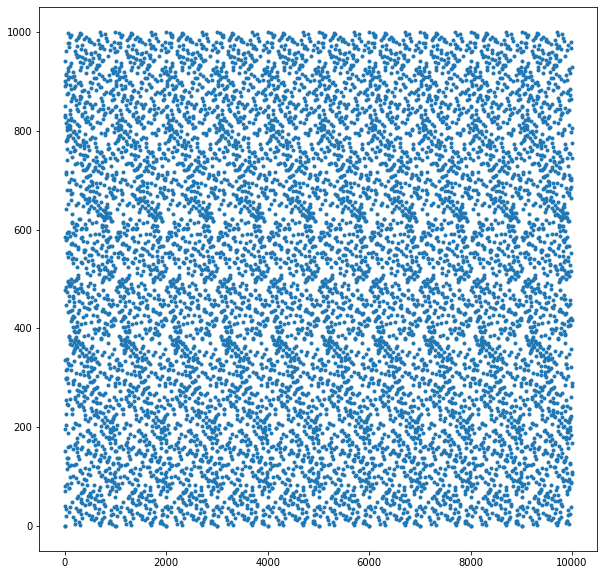

In [24]:
from matplotlib import pyplot as plt
from matplotlib import rcParams

plt.show()
rcParams['figure.figsize'] = [10, 10]
plt.plot(list(map(lambda x: x ** 17 % 1001, range(10000))), '.')

#### Dla wyniku z powyższego zadania policz, ile razy występuje liczba $13$. Nie korzystaj z pętli.

Rozwiązanie:

 * możemy stworzyć listę z wyniku i wykonać operację `list.count(13)`, stworzy to jednak całą tablicę w pamięci.

 * zamiast tego możemy odfiltrować wszelkie liczby nierówne $13$ i sprawdzić długość nowej listy.

 * zmieniając wszystkie elementy w $1$ i sumując te jedynki uzyskujemy długość kolekcji.

In [25]:
numbers = map(lambda x: x**17 % 1001, range(10000))
thirteens = filter(lambda x: x == 13, numbers)

sum(map(lambda x: 1, thirteens))

10

#### Dla listy liczb weź te, dla których pierwszą cyfrą po przecinku jest $5$ lub $7$. Skorzystaj z obiektu `map` z zadania o tworzeniu listy liczb losowych. Nie korzystaj z pętli.

Rozwiązanie:

 * wykonanie operacji `str` na liczbie daje nam zapis dziesiętny zmienno-przecinkowy.

 * dla liczb ze zbioru $[0,1)$ przecinek jest zawsze drugim znakiem, pierwsza cyfra za przecinkiem jest w takim razie znakiem o indeksie $2$.

 * poniższe rozwiązanie uwzględnia również przypadki bardzo małych liczb, które mogą być zapisane na przykład jako "7.52131e-09".

In [26]:
from random import random

l = map(lambda x: random(), range(10000))
filter(lambda x: str(x)[2] == '5' or str(x)[2] == '7', l)

Poniższy kod wyświetla wszelkie liczby spełniające wyżej wspomniany warunek.

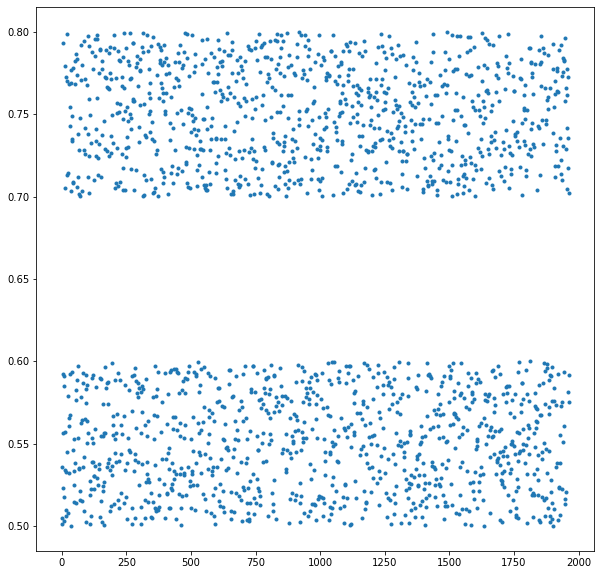

In [27]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
from random import random

l = map(lambda x: random(), range(10000))

plt.show()
rcParams['figure.figsize'] = [10, 10]
plt.plot(list(filter(lambda x: str(x)[2] == '5' or str(x)[2] == '7', l)), '.')

## Generatory i iteratory

#### Stwórz iterator analogiczny do ciągu Fibonacciego, tym razem jednak ze wzorem

$S_{n} = S_{n - 1} - S_{n - 2} + 2S_{n - 3}$

Niech warunki początkowe to $S_0 = 0, S_1 = 1, S_2 = 1$

Rozwiązanie:

 * Stwórz klasę przyjmującą jeden parametr `n` określający, ile elementów ma mieć nasz docelowy ciąg.
 * Przygotuj trzy pola odpowiadające odpowiednio, wiodącemu, drugiemu i trzeciemu elementowi ciągu. Poniżej nazwane `a`, `b` i `c`.
 * Stwórz metodę `__iter__`, z pomocą której nasz obiekt zwróci sam siebie.
 * Stwórz metodę `__next__`, która będzie zwracała kolejne elementy ciągu.
 * W metodzie `__next__` sprawdź, czy wykonaliśmy się mniej niż `n` razy.
 * Jeśli tak, to podstaw $a\coloneqq a - b + 2c, b\coloneqq a, c\coloneqq b$ i zwróć odpowiedni wyraz ciągu (poniżej zwracamy `c` przed podmianami żeby ciąg zacząć od wyrazu $0$).
 * Jeśli nie, wyrzuć `StopIteration` kończąc działanie iteratora.

In [28]:
class PMPIterator:
    def __init__(self, n):
        self.n = n
        self.a = 1
        self.b = 1
        self.c = 0

    def __iter__(self):
        return self

    def __next__(self):
        self.n -= 1
        if self.n < 0:
            raise StopIteration
        else:
            self.a, self.b, self.c = self.a - self.b + 2 * self.c, self.a, self.b
            return self.c


iter = PMPIterator(100)
for elem in iter:
    print(elem, end=' ')

1 1 0 1 3 2 1 5 8 5 7 18 21 17 32 57 59 66 121 173 184 253 415 530 621 921 1360 1681 2163 3202 4401 5525 7528 10805 14327 18578 25861 35937 47232 63017 87659 119106 157481 213693 294424 395693 528655 721810 984541 1320041 1779120 2428161 3289123 4419202 5986401 8145445 10997448 14824805 20118247 27288338 36819701 49767857 67524832 91396377 123407259 167060546 226446041 306200013 413875064 560567133 759092095 1026275090 1388317261 1880226361 2544459280 3440867441 4656860883 6304912002 8529786001 11538595765 15618633768 21139610005 28598167767 38695825298 52376877541 70877387777 95892160832 129768528137 175631142859 237646936386 321552849801 435168199133 588909222104 796846722573 1078273898735 1459245620370 1974665166781 2671967343881 3615793417840 4893156407521 

#### Stwórz generator analogiczny do zadania powyżej.

In [29]:
def PMPGenerator():
    a, b, c = 1, 1, 0
    while True:
        yield b
        a, b, c = a - b + 2 * c, a, b

k = 0
for s in PMPGenerator():
    k += 1
    if k > 100:
        break
    print(s, end=' ')

1 1 0 1 3 2 1 5 8 5 7 18 21 17 32 57 59 66 121 173 184 253 415 530 621 921 1360 1681 2163 3202 4401 5525 7528 10805 14327 18578 25861 35937 47232 63017 87659 119106 157481 213693 294424 395693 528655 721810 984541 1320041 1779120 2428161 3289123 4419202 5986401 8145445 10997448 14824805 20118247 27288338 36819701 49767857 67524832 91396377 123407259 167060546 226446041 306200013 413875064 560567133 759092095 1026275090 1388317261 1880226361 2544459280 3440867441 4656860883 6304912002 8529786001 11538595765 15618633768 21139610005 28598167767 38695825298 52376877541 70877387777 95892160832 129768528137 175631142859 237646936386 321552849801 435168199133 588909222104 796846722573 1078273898735 1459245620370 1974665166781 2671967343881 3615793417840 4893156407521 

## Wyrażenia regularne

## Wielowątkowość

## Profilowanie kodu